# Projeto 3 - MC886 Aprendizado de Máquina

Victor Prado Palmerini - 178061

Erik Soares - 155261

## Introdução

Este é o Projeto 2 da disciplina MC886 - Aprendizado de Máquina - 1S2021

Este trabalho é dividido em 2 partes que consistem em diferentes abordagens para resolver de obter o melhor modelo do jogo PacMan para jogar sozinho e atingir a vitória com o maior score possível. Na 1ª parte o modelo é treinado utilizando **Programação Genética**. E na 2ª parte o modelo utiliza **Aprendizado por Reforço**.

O jogo utilizado é uma implementação obtida por este [link](http://cs.brynmawr.edu/Courses/cs372/fall2017/Code/search.zip)

## Descrição Geral

O projeto se baseia neste notebook e em 2 scripts em **Python 2** (`genetic.py` e `reinforcement.py`) que executam junto com o projeto do jogo e são chamados por este notebook. Além disso, há outras implementações complementares que serão citadas ao longo do relatório.

## Parte 1 - Programação Genética

Nesta parte nos preocupamos em implementar os principais conceitos relacionados à Programação Genética, como a ideia de evolução de indivíduos e gerações, crossover, mutação, entre outros. Existem vários layouts disponíveis mas neste projeto focaremos em 3: `smallClassic`, `mediumClassic` e `originalClassic`.

### Desenvolvimento

A ideia geral do nosso algoritmo de programação genética é ter a 1ª geração de PacMans com movimentos totalmente aleatórios. Os possíveis movimentos de um indivíduo são: `Stop`, `North`, `East`, `West` e `South`. Claro que isso vai depender também da posição atual do indivíduo, mas em geral esses são os movimentos válidos.

A partir da 2ª geração a ideia é que os indivíduos herdem movimentos da geração anterior e que são alterados pro crossover e mutação.

Todos os movimentos de cada indivíduo de cada geração são armazenados em arquivos que são criados em tempo de execução do jogo. Isso é útil pois assim conseguimos dar replay no jogo de qualquer indíviduo após a sua execução.

De acordo com o código do projeto base, é possível criar agents que implementam alguma funcionalidade específica para cada caso de uso. No nosso caso, queremos um agent que se movimenta aleatoriamente (1ª geração) e um agent que carregue a sua sequência de  movimentos a partir de um arquivo e siga tais movimentos no jogo (outras gerações). O agent que se movimenta aleatoriamente está implementado no arquivo `randomAgents.py` e o agent que carrega um caminho está implementado no arquivo `geneticAgents.py`. No caso do 2° agent, caso ele esgote os caminhos carregados do arquivo ele seguirá a partir daí a direção que dará a ele o maior score e que não possui um fantasma. Então ele priorizará direções válidas que contém cápsulas ou pontos; se não houver nada ao redor então ele seleciona uma direção aleatória.

O script `genetic.py` responsável pela implementação do algoritmo de programação genética possui então um loop
principal que roda o nº de gerações especificado e para depois de obter todas as gerações ou quando o melhor e o pior indivíduo de uma mesma geração tiverem variação menor que `10%` no valor do fitness (mais sobre o fitness a seguir).

Implementamos 3 métodos para o cálculo do **fitness**:

- Score médio entre os n jogos rodados pra cada indivíduo (passado como parâmetro - o default é 3)
- Nº de vitórias dos n jogos rodados pra cada indivíduo
- Score médio / nº de movimentos do caminho com melhor score

#### Função de Fitness

A função de fitness pode ser especificada por parâmetro na execução do script `genetic.py` com a flag `--fitness`. O cálculo do fitness é importante pois é ele quem mensura a performance dos indivíduos de uma mesma geração. A seguir executaremos o jogo pra cada função de fitness implementada: `score médio`, `nº de vitórias` e `score médio / nº de movimentos`.

##### - Score Médio

##### - Nº de Vitórias

##### - Score Médio / N° de Movimentos

#### Tamanho da População

Nº de indivíduos que cada geração possui. No nosso modelo estamos considerando um valor constante entre gerações.

##### - 30 Indivíduos por geração

##### - 60 Indivíduos por geração

##### - 100 Indivíduos por geração

#### Nº de jogos de cada indivíduo

O projeto base permite que a gente rode N jogos pra um mesmo indivíduo e que a gente obtenha os resultados desses jogos. Portanto esse pode ser considerado um hiperparâmetro já que a priori consegue-se uma consistência maior nos resultados quando se executa mais jogos.

##### - 1 jogo

##### - 3 jogos

##### - 5 jogos

#### Elitismo

A cada geração mantemos os melhores indivíduos inalterados pois queremos que eles continuem sendo avaliados nas próximas gerações. Aqui então variamos a porcentagem de indivíduos que são mantidos pelo menos até a próxima geração.

##### - 5% melhores

##### - 10% melhores

##### - 20% melhores

### Análise

## Parte 2 - Aprendizado por Reforço

Nesta parte nos preocupamos em implementar os principais conceitos relacionados ao Aprendizado por Reforço. Neste paradigma treinamos o agente por várias épocas determinando a melhor decisão de acordo com as recompensas obtidas ao longo do processo de exploração. Também nos basearemos nos mesmos 3 layouts usados na Parte 1: `smallClassic`, `mediumClassic` e `originalClassic`.

### Implementações

In [109]:
import matplotlib.pyplot as plt

def plotResults(performance):
    fig, axs = plt.subplots(3, figsize=(15,15))
    axs[0].set_title('Rewards')
    axs[0].set_xlabel('Épocas')
    axs[0].set_xscale('log')
    axs[0].set_ylabel('Reward')
    axs[0].plot(ast.literal_eval(performance[0])['rewards'], 'g')

    axs[1].set_title('Actions')
    axs[1].set_xlabel('Épocas')
    axs[1].set_xscale('log')
    axs[1].set_ylabel('Ações')
    axs[1].plot(ast.literal_eval(performance[0])['actions'], 'y')

    axs[2].set_title('Score')
    axs[2].set_xlabel('Épocas')
    axs[2].set_xscale('log')
    axs[2].set_ylabel('Score')
    axs[2].plot(ast.literal_eval(performance[0])['scores'])

### Desenvolvimento

Para esta parte, decidimos por implementar o Q-Learning, um algoritmo bastante utilizado na área de Aprendizado por Reforço. A principal ideia é que salvamos as melhores decisões das várias posições percorridas pelo agente na fase de exploração. Após o treino, o agente consultará a tabela a cada posição para escolher a melhor direção naquele momento. Aqui entendemos por melhor direção o movimento que fará com que ele obtenha um melhor score.

O agente utilizado no algoritmo está implementado no arquivo `qLearningAgents.py`. Ele basicamente possui uma função `getAction` padrão do projeto base que insere ou atualiza o valor da ação. Este cálculo é obtido a partir da equação de Bellman (`bellman_equation()`). E há também uma função `final()`, também padrão do projeto base, que é chamada ao final de cada jogo e que reseta os parâmetros iniciais e faz com que o agente rode num modo menos aleatório e que consulte mais os valores da tabela obtidos na fase de exploração.

É importante citar que no Q-Learning existem alguns hiperparâmetros importantes para a análise do modelo. Estes são: **alpha**, **epsilon** e **gamma**. O alpha (learning rate) se refere ao quanto o agente aceita novos valores ao invés dos valores já armazenados. Já o epsilon determina o quanto o agente deve explorar ou consultar valores da tabela. E por fim, o gamma está relacionado a quanto o agente deve se preocupar na recompensa a longo prazo. No nosso caso, variamos os valores de alpha e epsilon para análise e mantivemos o valor do gamma fixo em 0.5.

Um outro hiperparâmetro importante é o n° de épocas que o agente usa pra treinar, isto é, para focar mais em explorar o ambiente e preencher a tabela de posições e ações. Portanto, também faremos uma análise de como esse hiperparâmetro influencia o resultado final. Por padrão, toda execução roda **n + 10 épocas**, em que **n** é o parâmetro passado e 10 é o número de jogos que o PacMan joga no modo de `exploitation`. Estes 10 últimos jogos serão úteis depois pra podermos comparar os resultados entre os modelos de aprendizado por reforço e programação genética.

Em relação à **formulação** do problema, os estados são as posições (x,y) do agente num determinado instante de tempo e para um determinado layout. As **ações** são os movimentos feitos nas direções: `North`, `East`, `South` e `West` e a **função de recompensa** (reward) é dada pela diferença de pontuação entre o estado atual (depois da ação) e o estado anterior.

##### - 2000 épocas

In [110]:
# smallClassic
performance_2000_small = ! python reinforcement.py --numGames 2000 --layout smallClassic

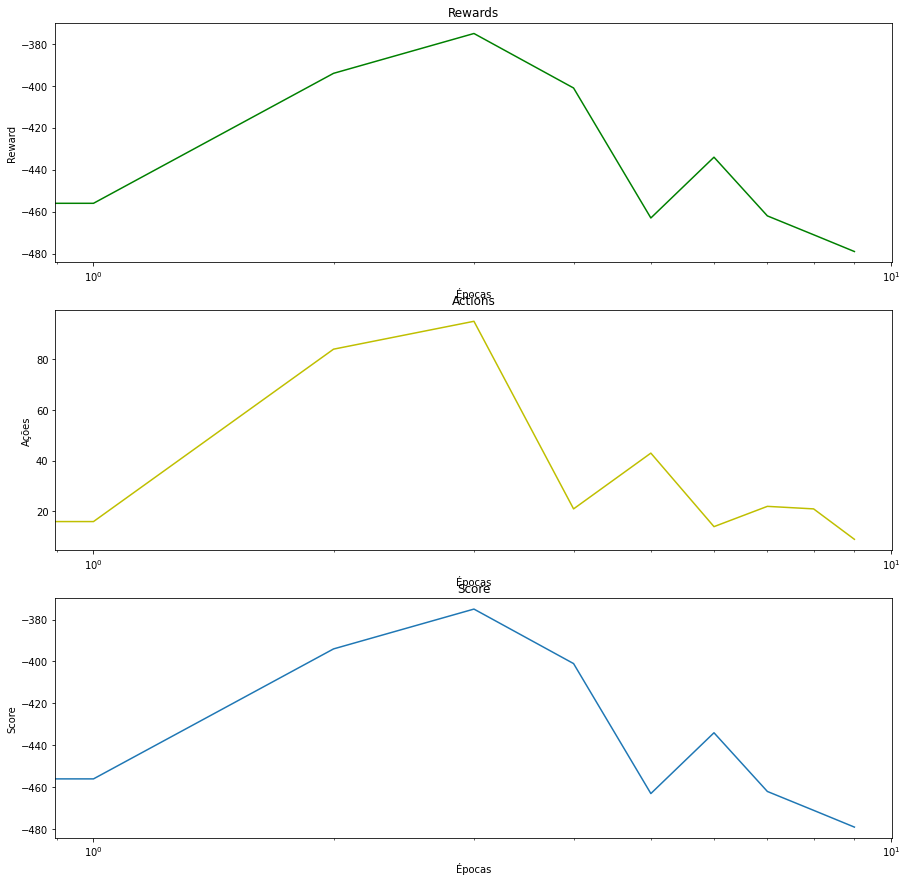

In [111]:
plotResults(performance_2000_small)

In [112]:
# mediumClassic
performance_2000_medium = ! python reinforcement.py --numGames 2000 --layout mediumClassic

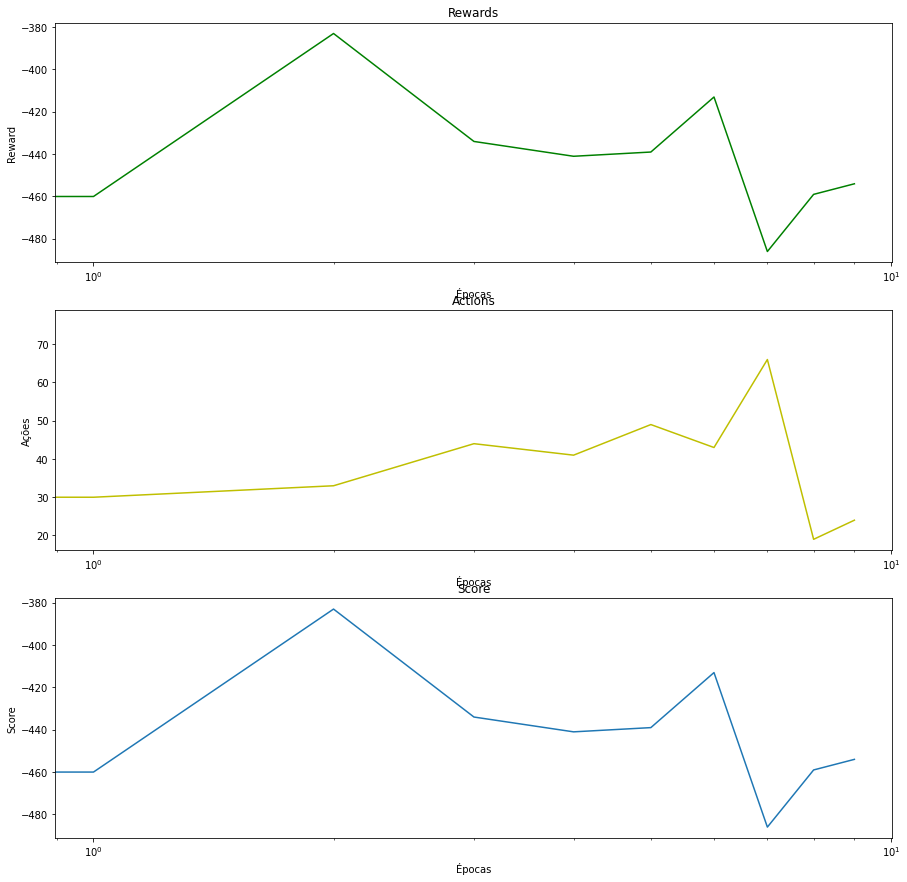

In [113]:
plotResults(performance_2000_medium)

In [114]:
# originalClassic
performance_2000_original = ! python reinforcement.py --numGames 2000 --layout originalClassic

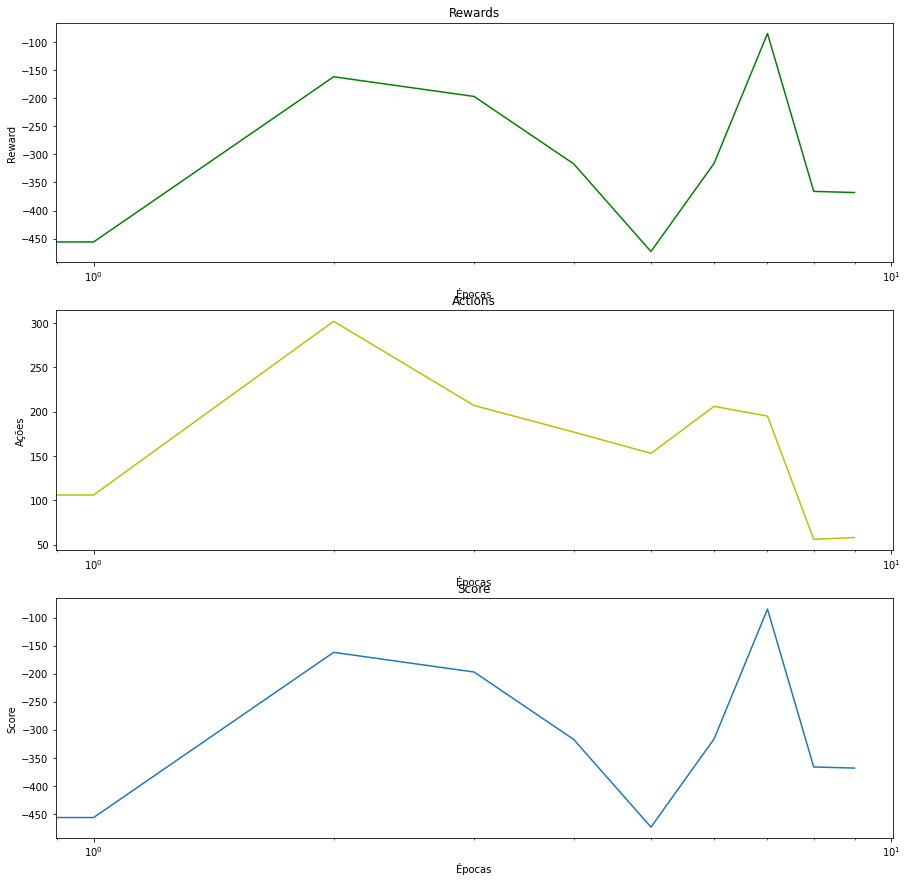

In [115]:
plotResults(performance_2000_original)

<BarContainer object of 3 artists>

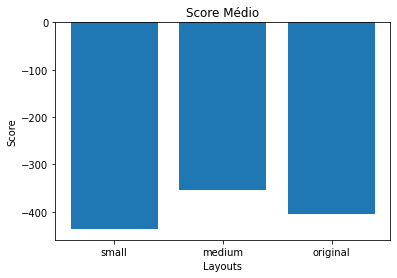

In [116]:
# score médio
import matplotlib.pyplot as plt

data = {'small': ast.literal_eval(performance_2000_small[-1])['score'], 'medium': ast.literal_eval(performance_2000_medium[-1])['score'], 'original': ast.literal_eval(performance_2000_original[-1])['score']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Score Médio')
fig.set_xlabel('Layouts')
fig.set_ylabel('Score')
fig.bar(names, values)

<BarContainer object of 3 artists>

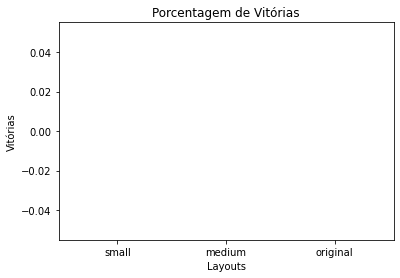

In [117]:
# porcentagem de vitórias
data = {'small': ast.literal_eval(performance_2000_small[-1])['win_percentage'], 'medium': ast.literal_eval(performance_2000_medium[-1])['win_percentage'], 'original': ast.literal_eval(performance_2000_original[-1])['win_percentage']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Porcentagem de Vitórias')
fig.set_xlabel('Layouts')
fig.set_ylabel('Vitórias')
fig.bar(names, values)

##### - 4000 épocas

In [118]:
# smallClassic
performance_4000_small = ! python reinforcement.py --numGames 4000 --layout smallClassic

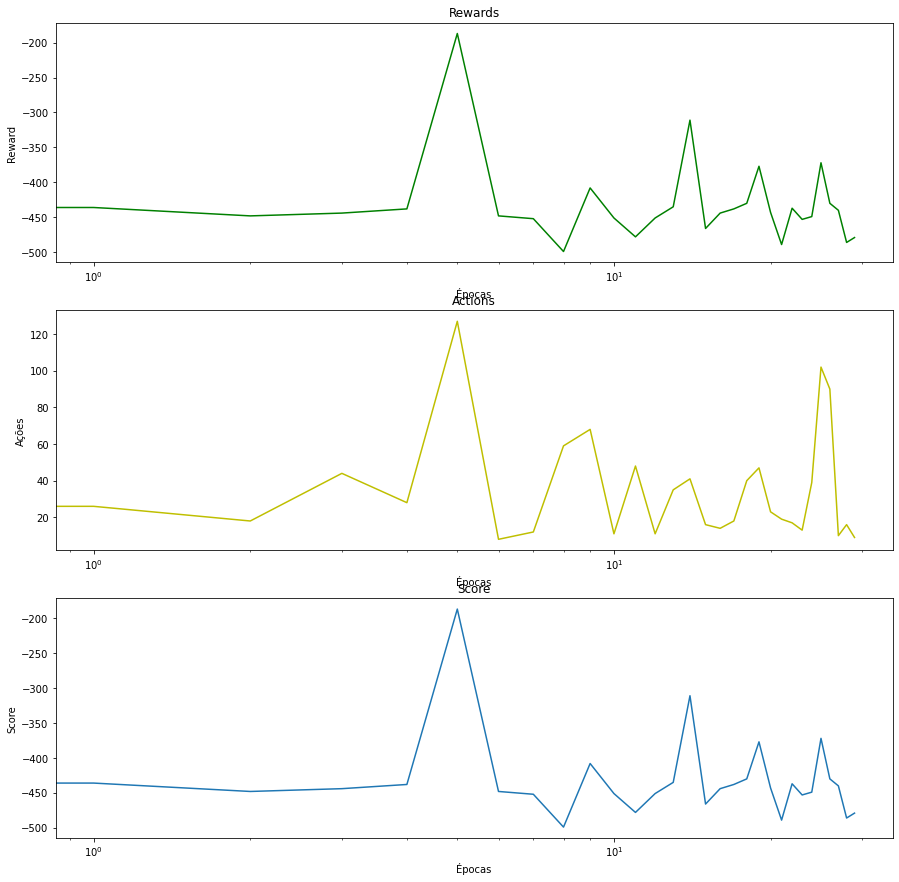

In [119]:
plotResults(performance_4000_small)

In [120]:
# mediumClassic
performance_4000_medium = ! python reinforcement.py --numGames 4000 --layout mediumClassic

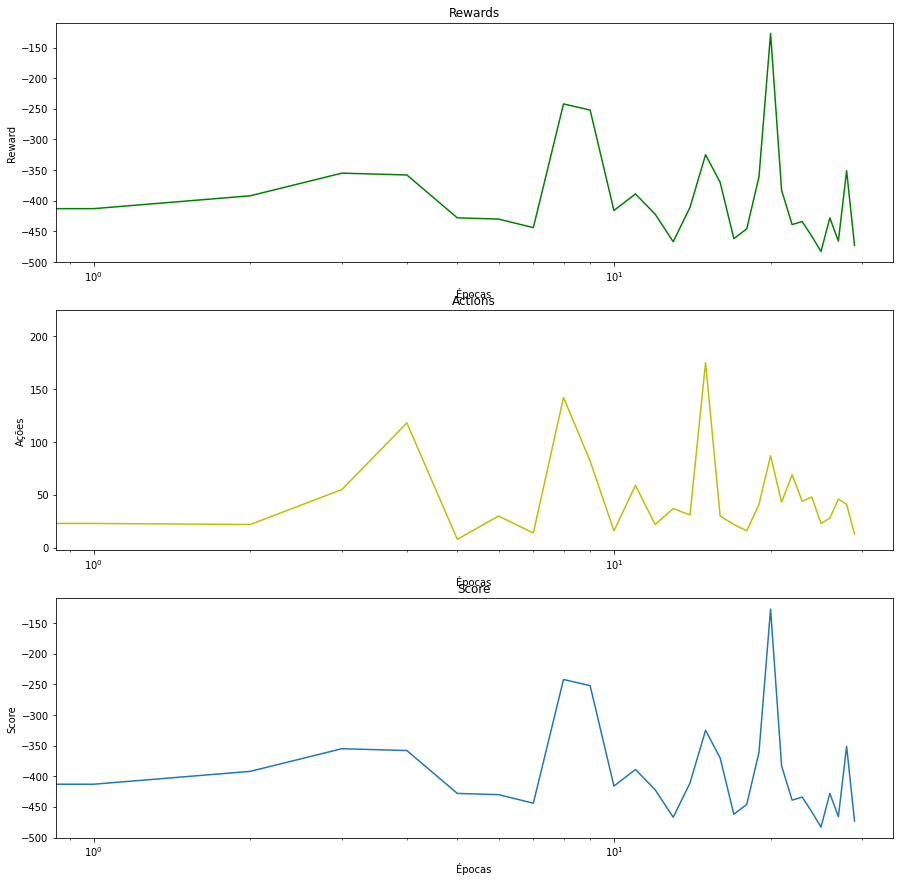

In [121]:
plotResults(performance_4000_medium)

In [122]:
# originalClassic
performance_4000_original = ! python reinforcement.py --numGames 4000 --layout originalClassic

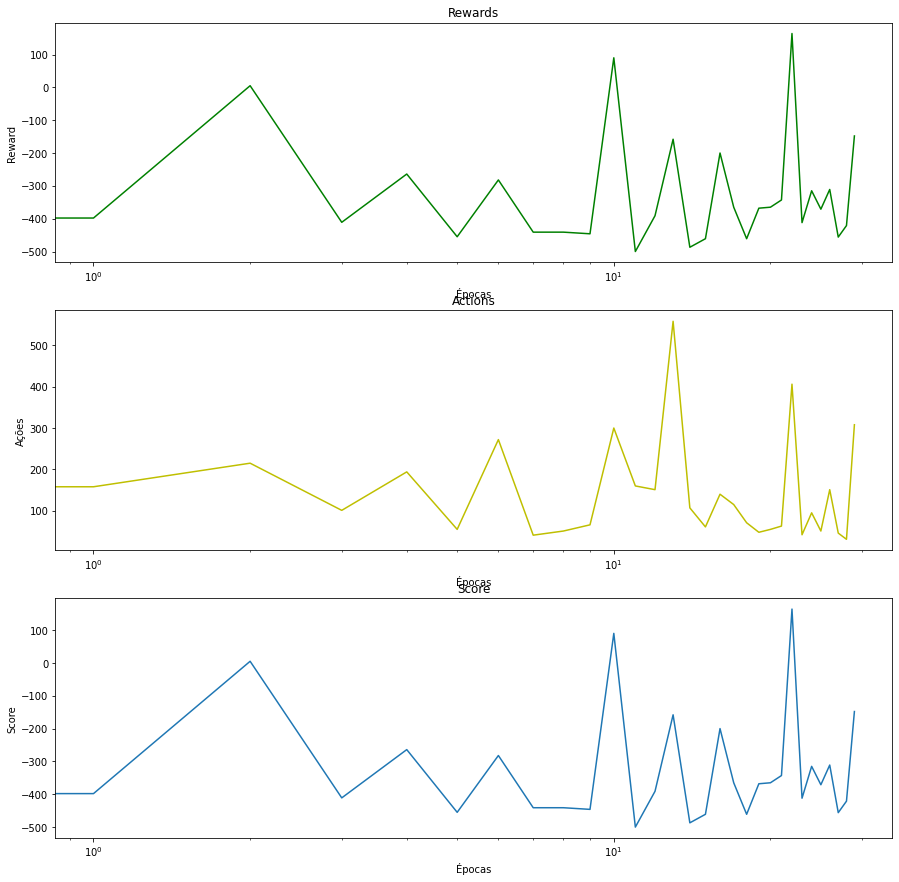

In [123]:
plotResults(performance_4000_original)

<BarContainer object of 3 artists>

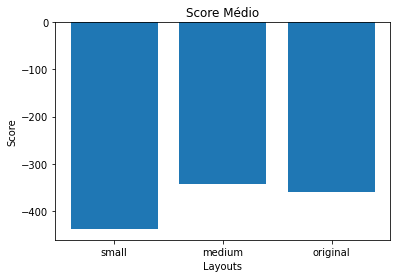

In [124]:
import matplotlib.pyplot as plt

# score médio
data = {'small': ast.literal_eval(performance_4000_small[-1])['score'], 'medium': ast.literal_eval(performance_4000_medium[-1])['score'], 'original': ast.literal_eval(performance_4000_original[-1])['score']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Score Médio')
fig.set_xlabel('Layouts')
fig.set_ylabel('Score')
fig.bar(names, values)

<BarContainer object of 3 artists>

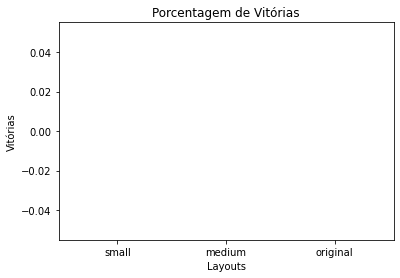

In [125]:
# porcentagem de vitórias
data = {'small': ast.literal_eval(performance_4000_small[-1])['win_percentage'], 'medium': ast.literal_eval(performance_4000_medium[-1])['win_percentage'], 'original': ast.literal_eval(performance_4000_original[-1])['win_percentage']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Porcentagem de Vitórias')
fig.set_xlabel('Layouts')
fig.set_ylabel('Vitórias')
fig.bar(names, values)

##### - 6000 épocas

In [126]:
# smallClassic
performance_6000_small = ! python reinforcement.py --numGames 6000 --layout smallClassic

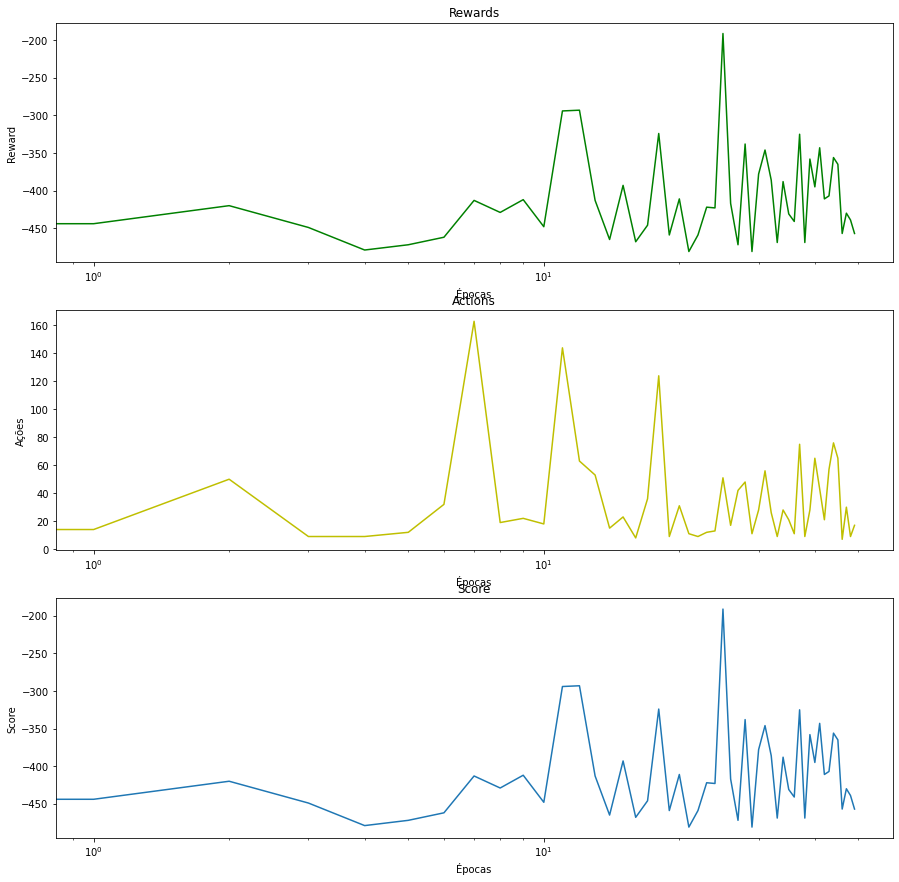

In [127]:
plotResults(performance_6000_small)

In [128]:
# mediumClassic
performance_6000_medium = ! python reinforcement.py --numGames 6000 --layout mediumClassic

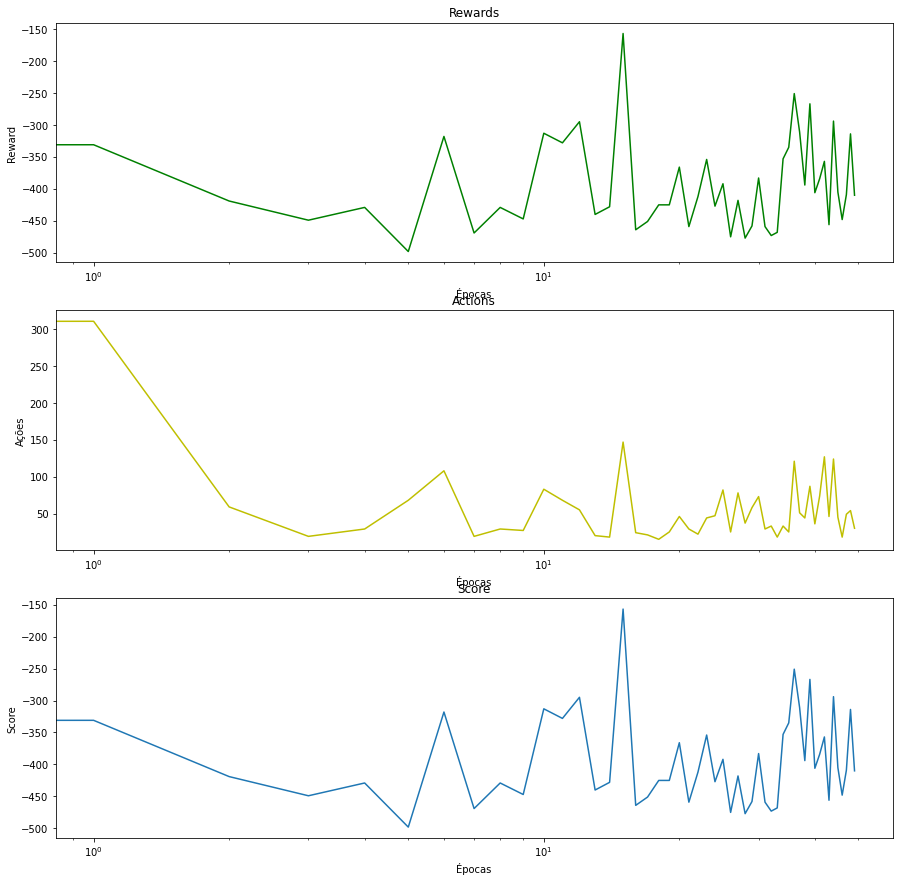

In [129]:
plotResults(performance_6000_medium)

In [130]:
# originalClassic
performance_6000_original = ! python reinforcement.py --numGames 6000 --layout originalClassic

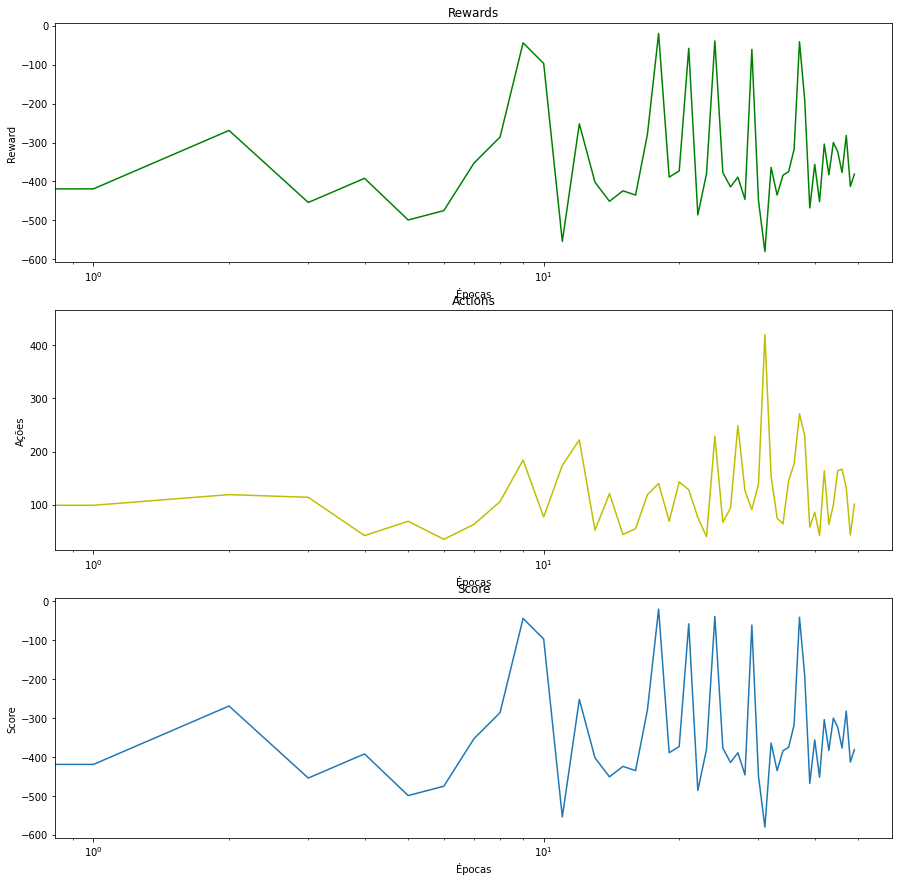

In [131]:
plotResults(performance_6000_original)

<BarContainer object of 3 artists>

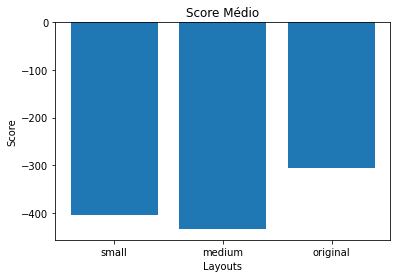

In [132]:
import matplotlib.pyplot as plt

# score médio
data = {'small': ast.literal_eval(performance_6000_small[-1])['score'], 'medium': ast.literal_eval(performance_6000_medium[-1])['score'], 'original': ast.literal_eval(performance_6000_original[-1])['score']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Score Médio')
fig.set_xlabel('Layouts')
fig.set_ylabel('Score')
fig.bar(names, values)

<BarContainer object of 3 artists>

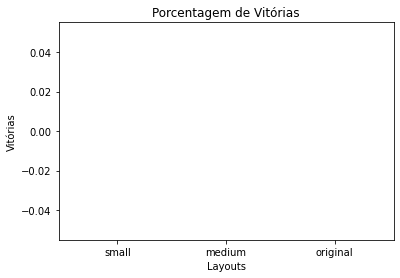

In [133]:
# porcentagem de vitórias
data = {'small': ast.literal_eval(performance_6000_small[-1])['win_percentage'], 'medium': ast.literal_eval(performance_6000_medium[-1])['win_percentage'], 'original': ast.literal_eval(performance_6000_original[-1])['win_percentage']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Porcentagem de Vitórias')
fig.set_xlabel('Layouts')
fig.set_ylabel('Vitórias')
fig.bar(names, values)

#### Learning Rate e Exploration Rate

#####  Alpha = Epsilon = 1

In [134]:
performance_10 = ! python reinforcement.py --numGames 4000 --learningRate 1 --explorationRate 1 --layout mediumClassic

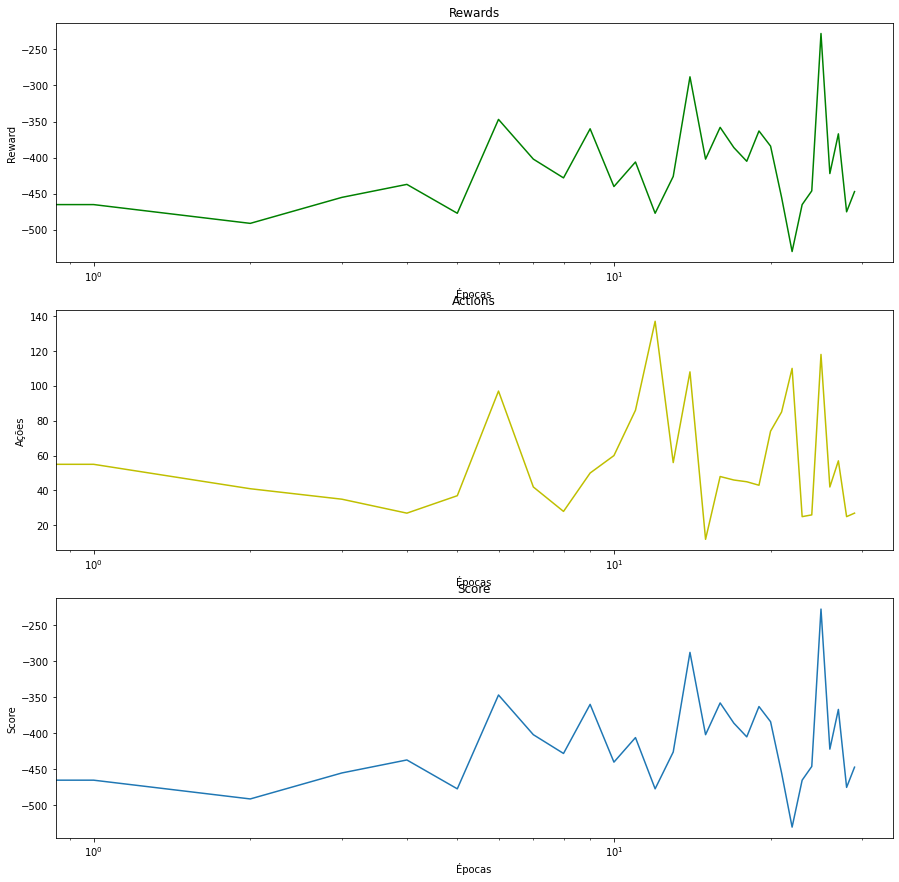

In [135]:
plotResults(performance_10)

#####  Alpha = Epsilon = 0.8

In [136]:
performance_08 = ! python reinforcement.py --numGames 4000 --learningRate 0.8 --explorationRate 0.8 --layout mediumClassic

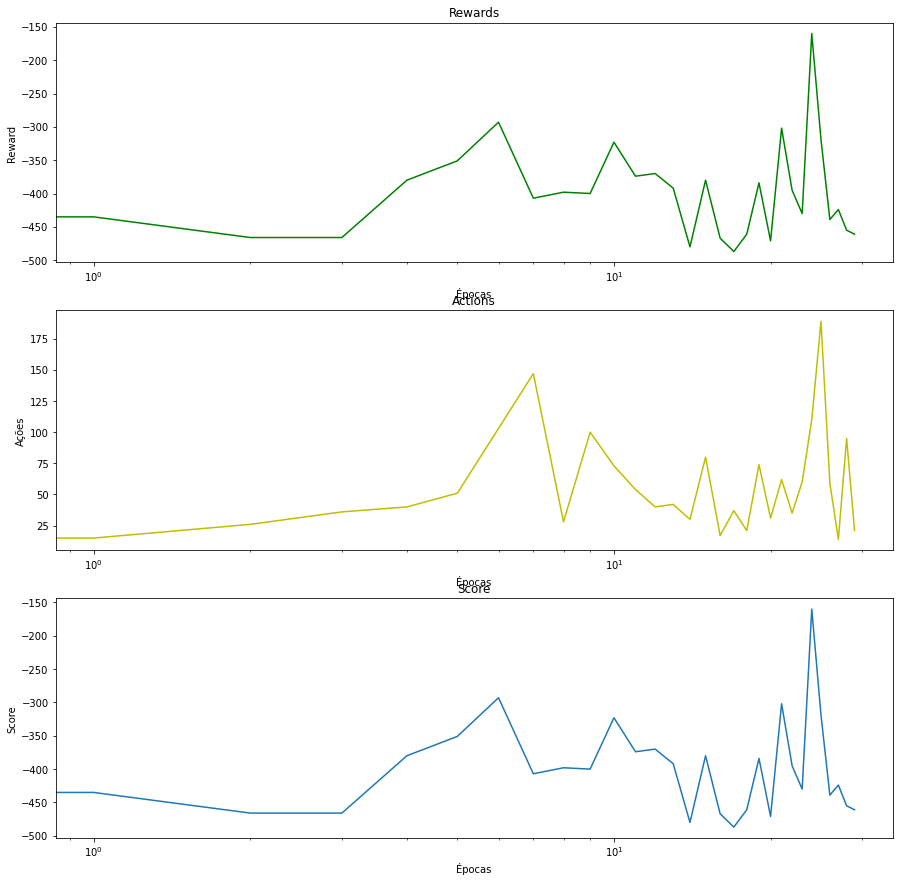

In [137]:
plotResults(performance_08)

#####  Alpha = Epsilon = 0.6

In [138]:
performance_06 = ! python reinforcement.py --numGames 4000 --learningRate 0.6 --explorationRate 0.6 --layout mediumClassic

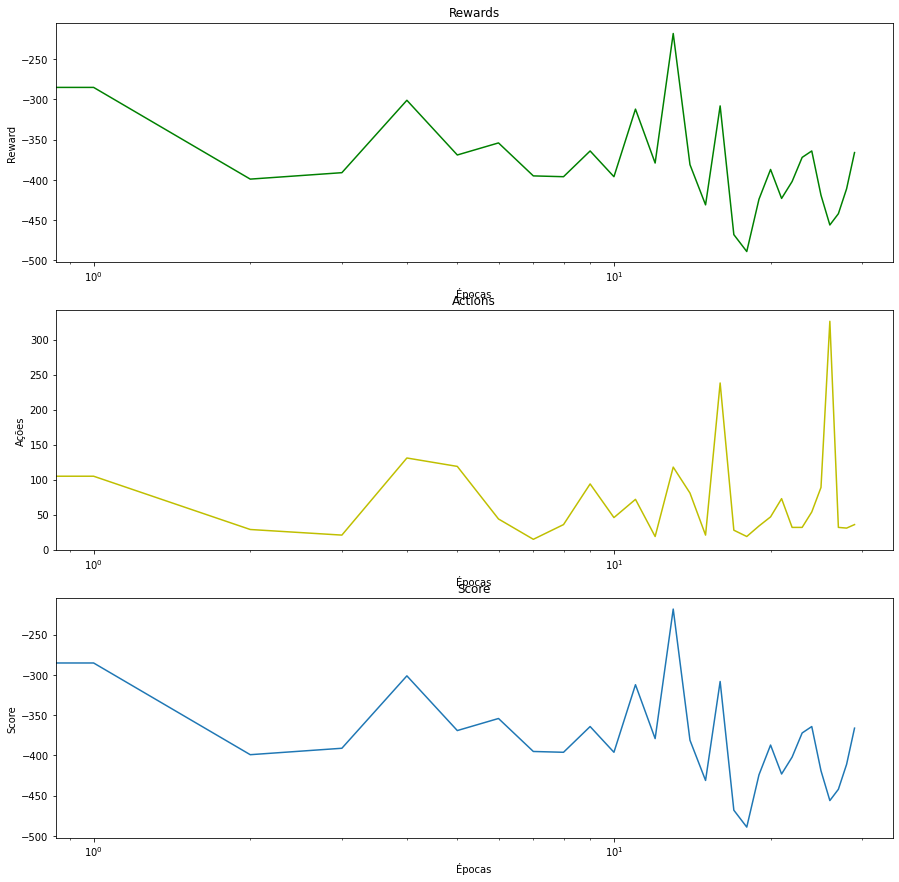

In [139]:
plotResults(performance_06)

<BarContainer object of 3 artists>

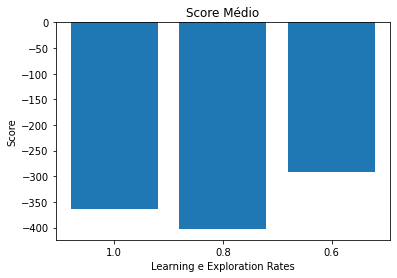

In [140]:
import ast
import matplotlib.pyplot as plt

# score médio
data = {'1.0': ast.literal_eval(performance_10[-1])['score'], '0.8': ast.literal_eval(performance_08[-1])['score'], '0.6': ast.literal_eval(performance_06[-1])['score']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Score Médio')
fig.set_xlabel('Learning e Exploration Rates')
fig.set_ylabel('Score')
fig.bar(names, values)

<BarContainer object of 3 artists>

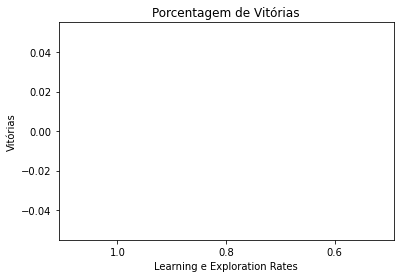

In [141]:
# porcentagem de vitórias
data = {'1.0': ast.literal_eval(performance_10[-1])['win_percentage'], '0.8': ast.literal_eval(performance_08[-1])['win_percentage'], '0.6': ast.literal_eval(performance_06[-1])['win_percentage']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Porcentagem de Vitórias')
fig.set_xlabel('Learning e Exploration Rates')
fig.set_ylabel('Vitórias')
fig.bar(names, values)

### Análise

### Programação Genética vs Aprendizado por Reforço